# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [429]:
import pandas as pd                 # data read & manipulation
import matplotlib.pyplot as plt     # data visulization
import seaborn as sns
%matplotlib inline
import numpy as np                  # data read & manipulation

#importing models for spliiting data set & liner Regression model to train
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# to cherck model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



import statsmodels.api as sm        # to build linear regression model using stats model



## Loading the dataset

In [430]:
data = pd.read_csv("/content/Dataset - User Device Data.csv")   #data reading from csv file from drive
data.head(50)                                                   # rendering top 50 data

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958
7,Honor,Android,15.77,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,4.729421,5.188726
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
9,Honor,Android,16.23,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,4.773224,5.073610


## Data Overview

- Observations
- Sanity checks

In [431]:
# checking number of rows & columns of data
data.shape

(3454, 15)

There are 3454 rows & 15 columns in given data set

In [432]:
# analyzing NULL/NON NULL values & datatype of col

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

1. All columns have non NULL values
2. Numerical data: screen_size, main_camera_mp, selfie_camera_mp, memory, ram,      battery, weight, release_year, days_used,  normalized_used_price, normalized_new_price

3. Categorical Data: brand_name, os, 4g, 5g


In [433]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


1. 3214 Android mobiles & 502 others. Android is most popular mobile phone.
1. 34 different manufacturing brands
2. 4 different OS types
3. 4G/5G have either yes or no values
4. 4G devices >>> 5G devices || More 4G devices
5. most numerical data is positively skewed or right-skewed as mean is larger than median

In [434]:
# making a copy of data as we should not manipulate the original dataset

df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [435]:
# check for any missing value

df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [436]:
# printing missing values

df[df.isnull().any(axis=1)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


In [437]:
#replacing missing value with median
df = df.fillna(df.median())


<ipython-input-437-2ab2939e0100>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [438]:
#check for duplicates in data

df.duplicated().sum()

0

No duplicates

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [439]:
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


# 1. What does the distribution of normalized used device prices look like?

<Axes: >

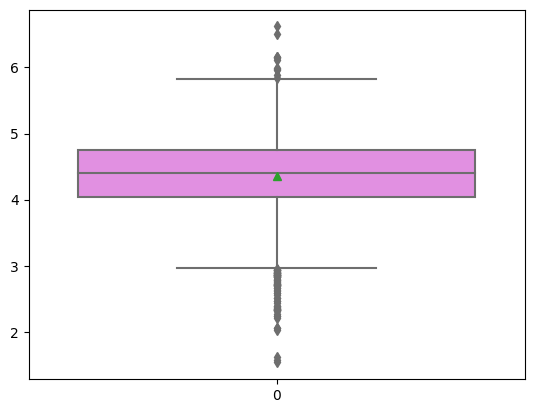

In [440]:
sns.boxplot(df["normalized_used_price"], showmeans=True, color="violet")

<Axes: xlabel='normalized_used_price', ylabel='Count'>

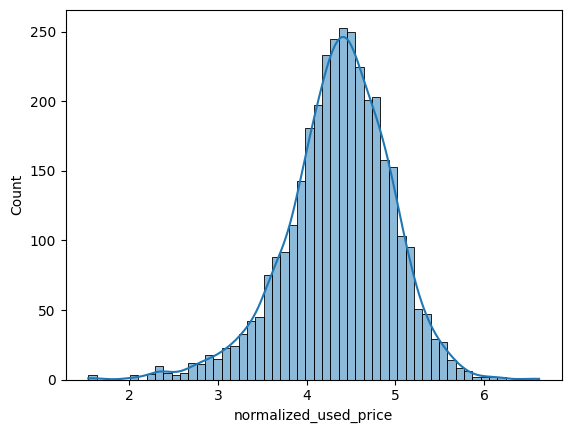

In [441]:
sns.histplot(df["normalized_used_price"], kde=True)

Histogram plot of old price

<Axes: >

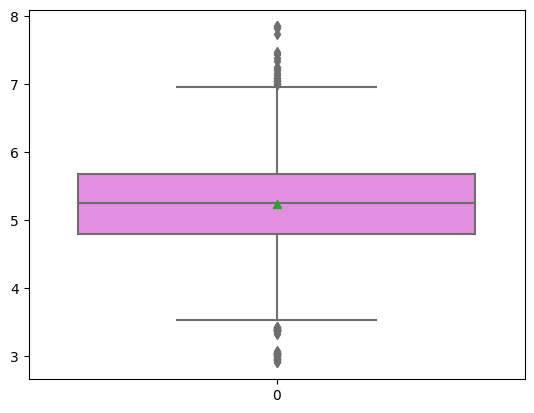

In [442]:
sns.boxplot(df["normalized_new_price"], showmeans=True, color="violet")

<Axes: xlabel='normalized_new_price', ylabel='Count'>

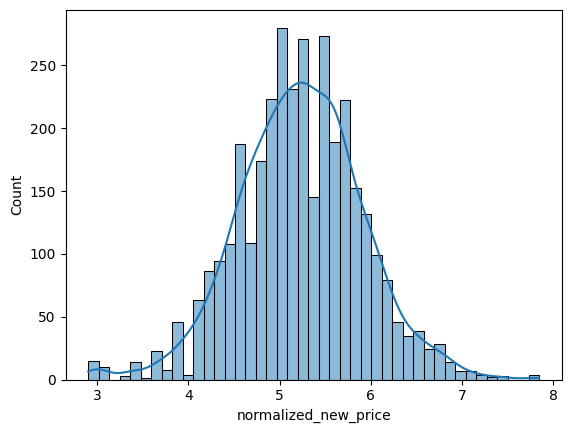

In [443]:
sns.histplot(df["normalized_new_price"], kde=True)

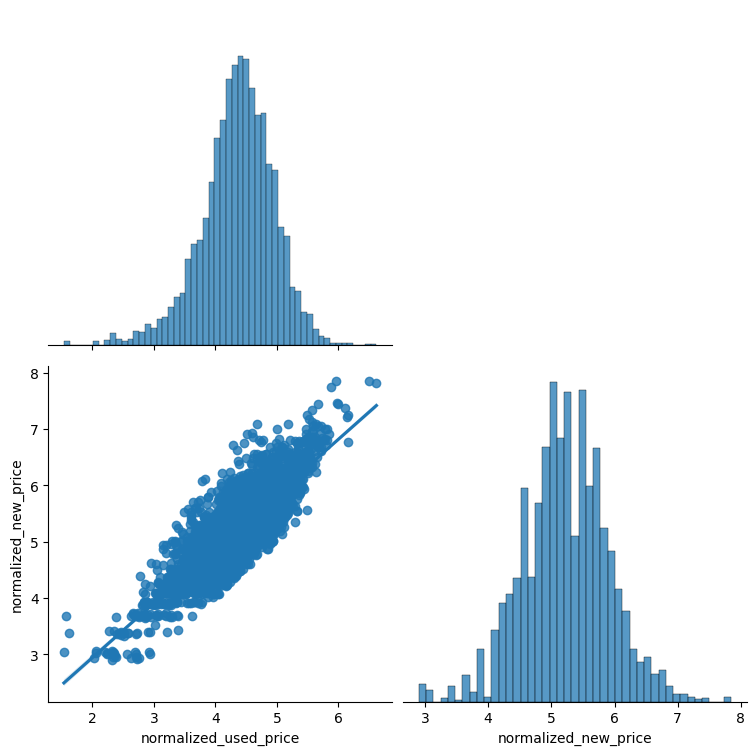

Linear correlation factor between normalized_new_price and normalized_used_price 0.83


<ipython-input-444-0fbae826b17c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr()["normalized_used_price"]["normalized_new_price"] , 2))


In [444]:
g = sns.pairplot(data = df[["normalized_used_price","normalized_new_price"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between normalized_new_price and normalized_used_price", \
      round(df.corr()["normalized_used_price"]["normalized_new_price"] , 2))


Linear correlation factor between normalized_new_price and normalized_used_price 0.83

# 2. What percentage of the used device market is dominated by Android devices?

In [445]:
def barplot_LabelledInfo(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

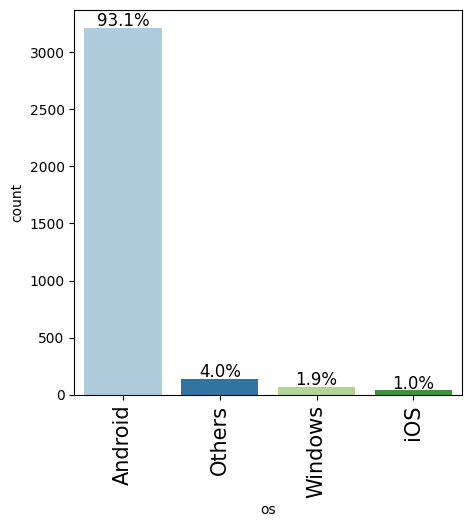

In [446]:
barplot_LabelledInfo(df, "os", perc=True)

as most of the devices are ANDROID, we can group Others, Windows, iOS into 1 category

In [447]:
df.loc[df.os=="Others", "os"] = "NA_Android"
df.loc[df.os=="Windows", "os"] = "NA_Android"
df.loc[df.os=="iOS", "os"] = "NA_Android"

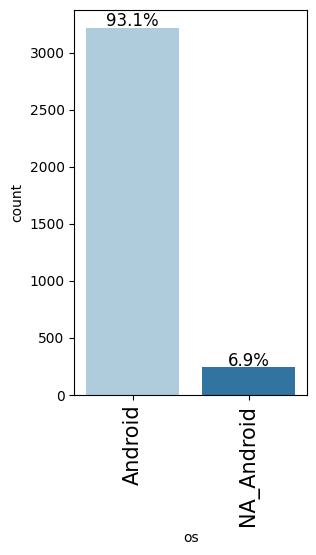

In [448]:
barplot_LabelledInfo(df, "os", perc=True)

# 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

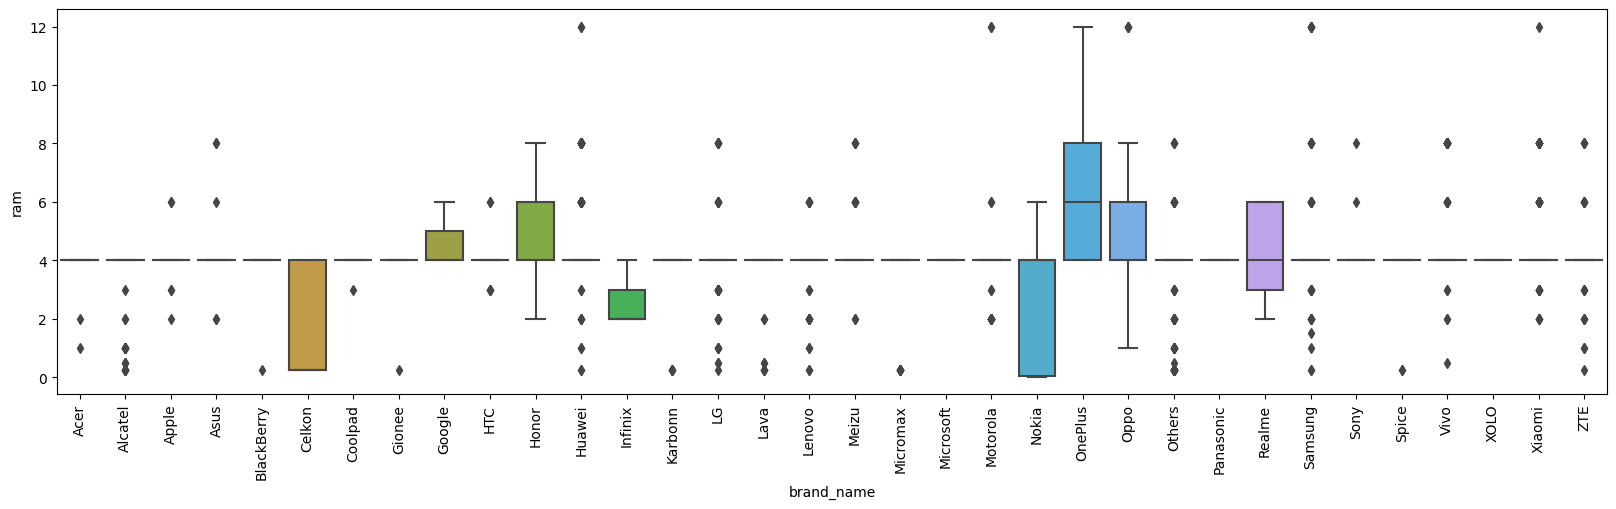

In [449]:
plt.figure(figsize=(20,5))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.show()

Mostly we have 4GB of RAM in devices.Indicating very less veriance .
BTW, we still have some outluiners in the data.

also, we can drop the RAM column because of the common behavious amoung most devices

In [450]:
# dropping ram

df.drop("ram", axis=1, inplace=True)

# 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?


In [451]:
df_battery = df[df["battery"] > 4500]
df_battery

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,5100.0,173.0,2019,321,4.556295,5.304001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,5000.0,222.0,2020,197,5.623042,6.792120
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,5000.0,220.0,2020,176,5.594265,6.960775
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,6000.0,188.0,2019,455,4.781641,5.109937
3448,Asus,Android,16.74,yes,no,8.0,24.0,128.0,6000.0,240.0,2019,325,5.715316,7.059317


we hqave total of 341 devices having battery more than 4500 mAh

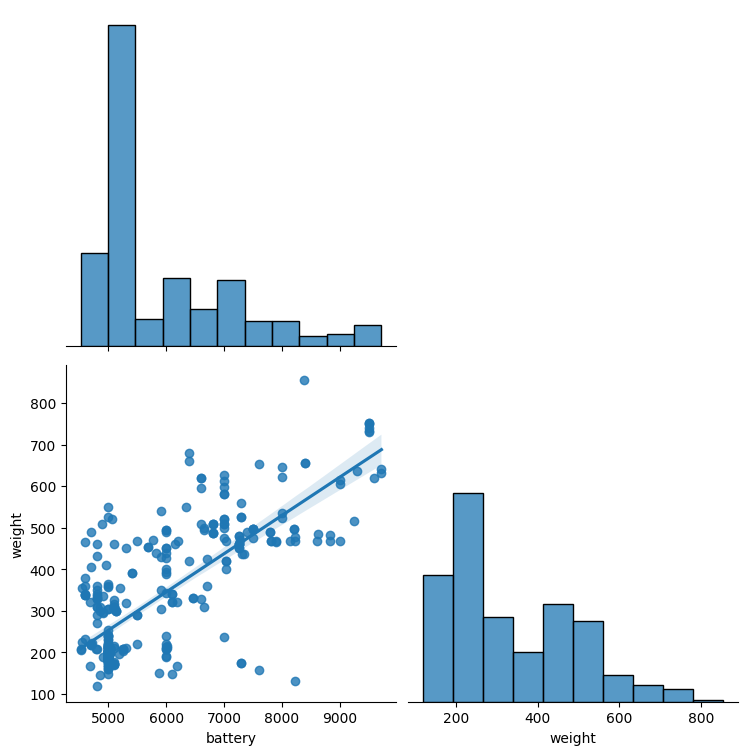

In [452]:
g = sns.pairplot(data = df_battery[["battery","weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()

In [453]:
print("Linear correlation factor between phone's weight and battery", round(df_battery.corr()["weight"]["battery"] , 3))

Linear correlation factor between phone's weight and battery 0.758


<ipython-input-453-9e7ceb3baac4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Linear correlation factor between phone's weight and battery", round(df_battery.corr()["weight"]["battery"] , 3))


as Linear correlation factor between phone's weight and battery 0.758, we can say that increase in battery size is directly related to increase in mobile weight

# 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [454]:
# screen size given in cm, hence we need to convert it into inches by multypling it by 2.54
# i.e. 6 * 2.54 = 15.24

df_screen = df[df["screen_size"] > 15.24]
df_screen

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,NA_Android,15.27,yes,no,8.0,7.0,64.0,3110.0,194.0,2019,208,5.100902,6.287933
3448,Asus,Android,16.74,yes,no,8.0,24.0,128.0,6000.0,240.0,2019,325,5.715316,7.059317
3449,Asus,Android,15.34,yes,no,8.0,8.0,64.0,5000.0,190.0,2019,232,4.492337,6.483872
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,4000.0,165.0,2020,201,4.357350,4.528829


we have 1099 device's with a screen size larger than 6 inches

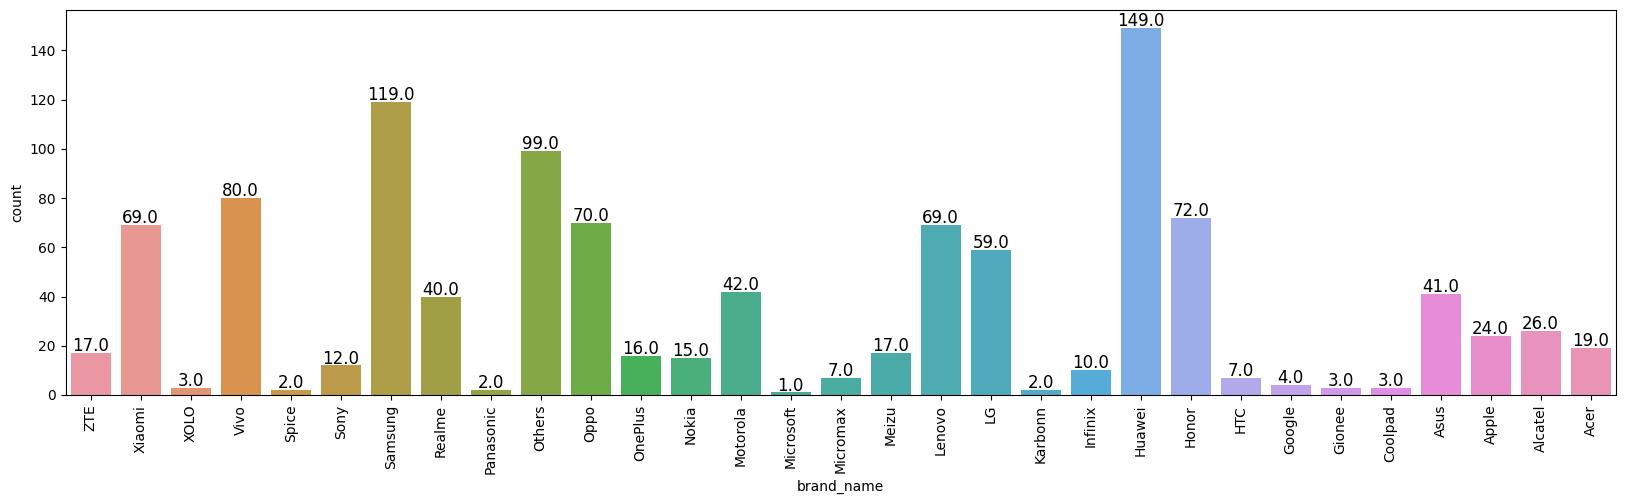

In [455]:
# plotting screen size with brand


plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_screen.sort_values("brand_name", ascending=False), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)
plt.show()

we have the largest screen size in HAUWEI followed by SAMSUNG then HONOR & so on

# 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [456]:
df_selfieCamera = df[df["selfie_camera_mp"] > 8]
df_selfieCamera

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,3750.0,172.0,2019,395,5.022366,5.517935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,Samsung,Android,15.34,yes,no,12.0,16.0,32.0,4000.0,169.0,2019,369,4.760377,5.049151
3439,Samsung,Android,15.34,yes,no,12.0,32.0,64.0,4000.0,169.0,2019,315,5.137092,5.443240
3440,Samsung,Android,15.44,yes,no,12.0,10.0,256.0,4300.0,196.0,2019,489,5.200153,6.509499
3441,Samsung,Android,15.32,yes,no,12.0,10.0,256.0,3500.0,168.0,2019,429,5.205050,6.250940


We have a total of 655 mobile devices offering greater than 8MP selfie cameras across brands

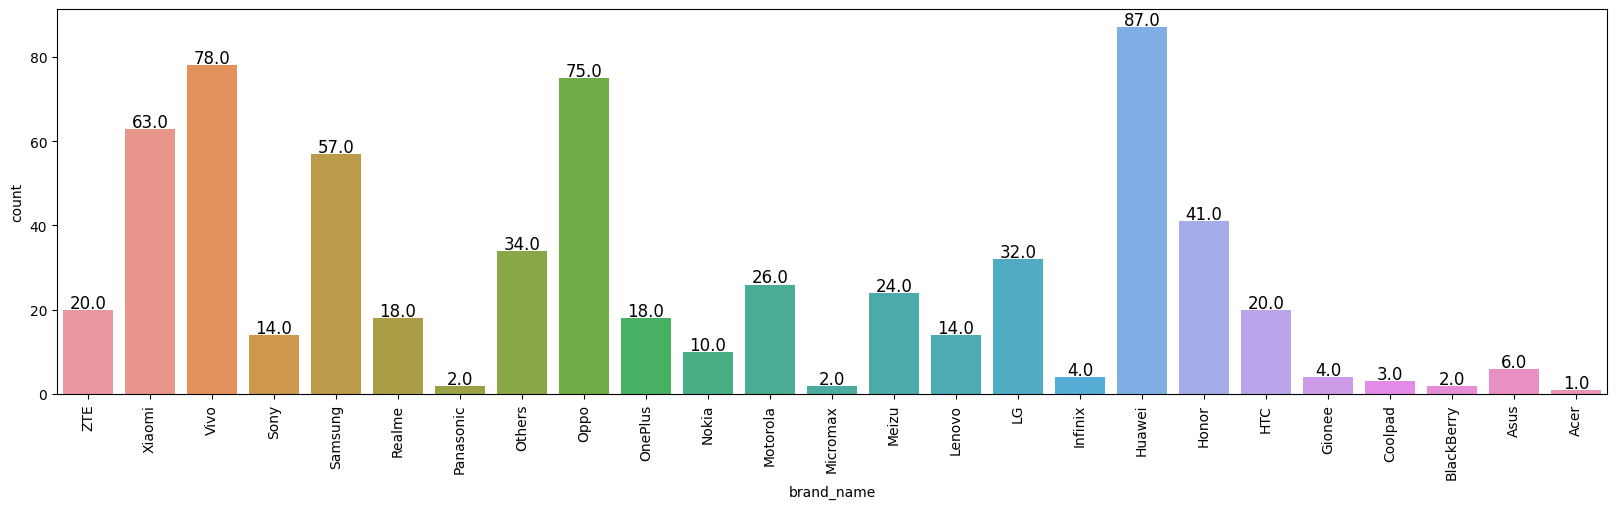

In [457]:
# plotting Selfie Camera with brand


plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_selfieCamera.sort_values("brand_name", ascending=False), x = "brand_name");
plt.xticks(rotation=90)
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)
plt.show()

In this also, HAUWEI offers the more number of devices having 8mp of camera followed by VIVO & OPPO

also, pointed to be noted, some relation was with devices with large screen.

# 7. Which attributes are highly correlated with the normalized price of a used device?

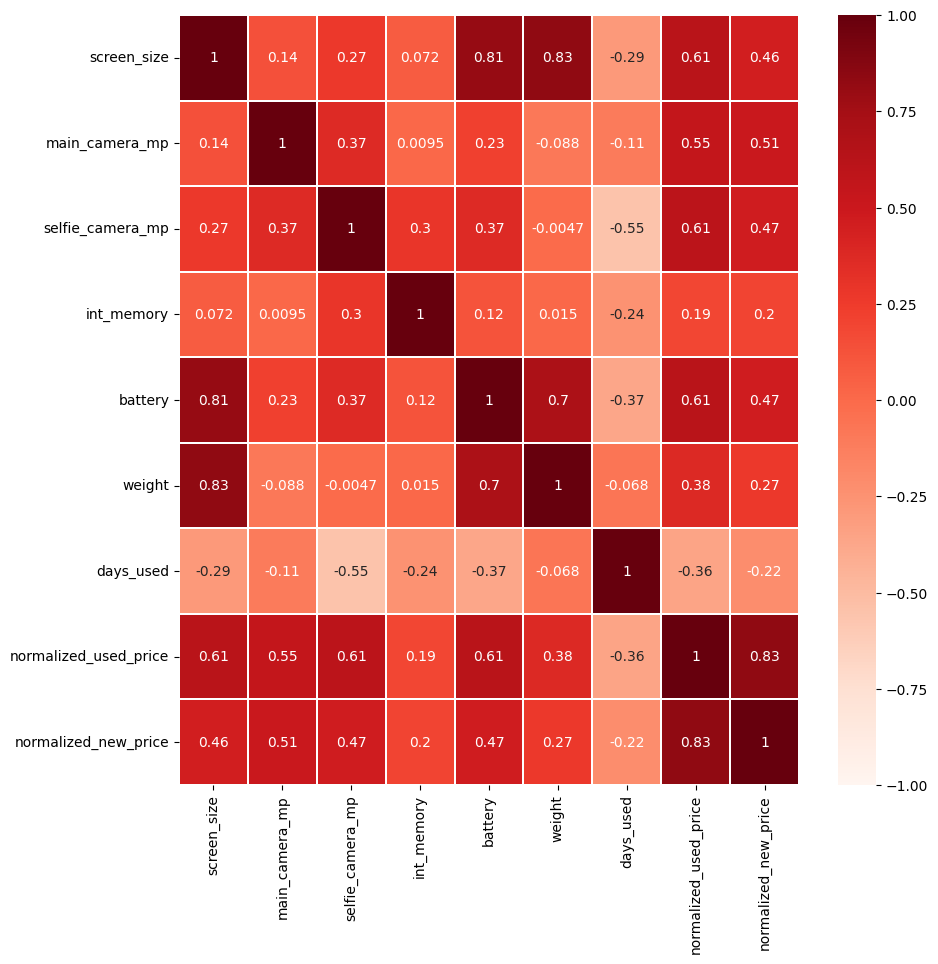

In [458]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") # not required as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Reds", linewidths=0.05);

With the normalized price of a used device are:-
1. Very strongly corelated with normalized_new_price with a value of 0.83
2. Next corelated with screen_size, selfie_camera_mp & battery
3. Point to be noted, normalized price of a used device is negatively corelated with **days_used**

# Outlier detection and treatment (if needed)

for detecting outliners, first we have to plot all columns. & plotting using Box Plot

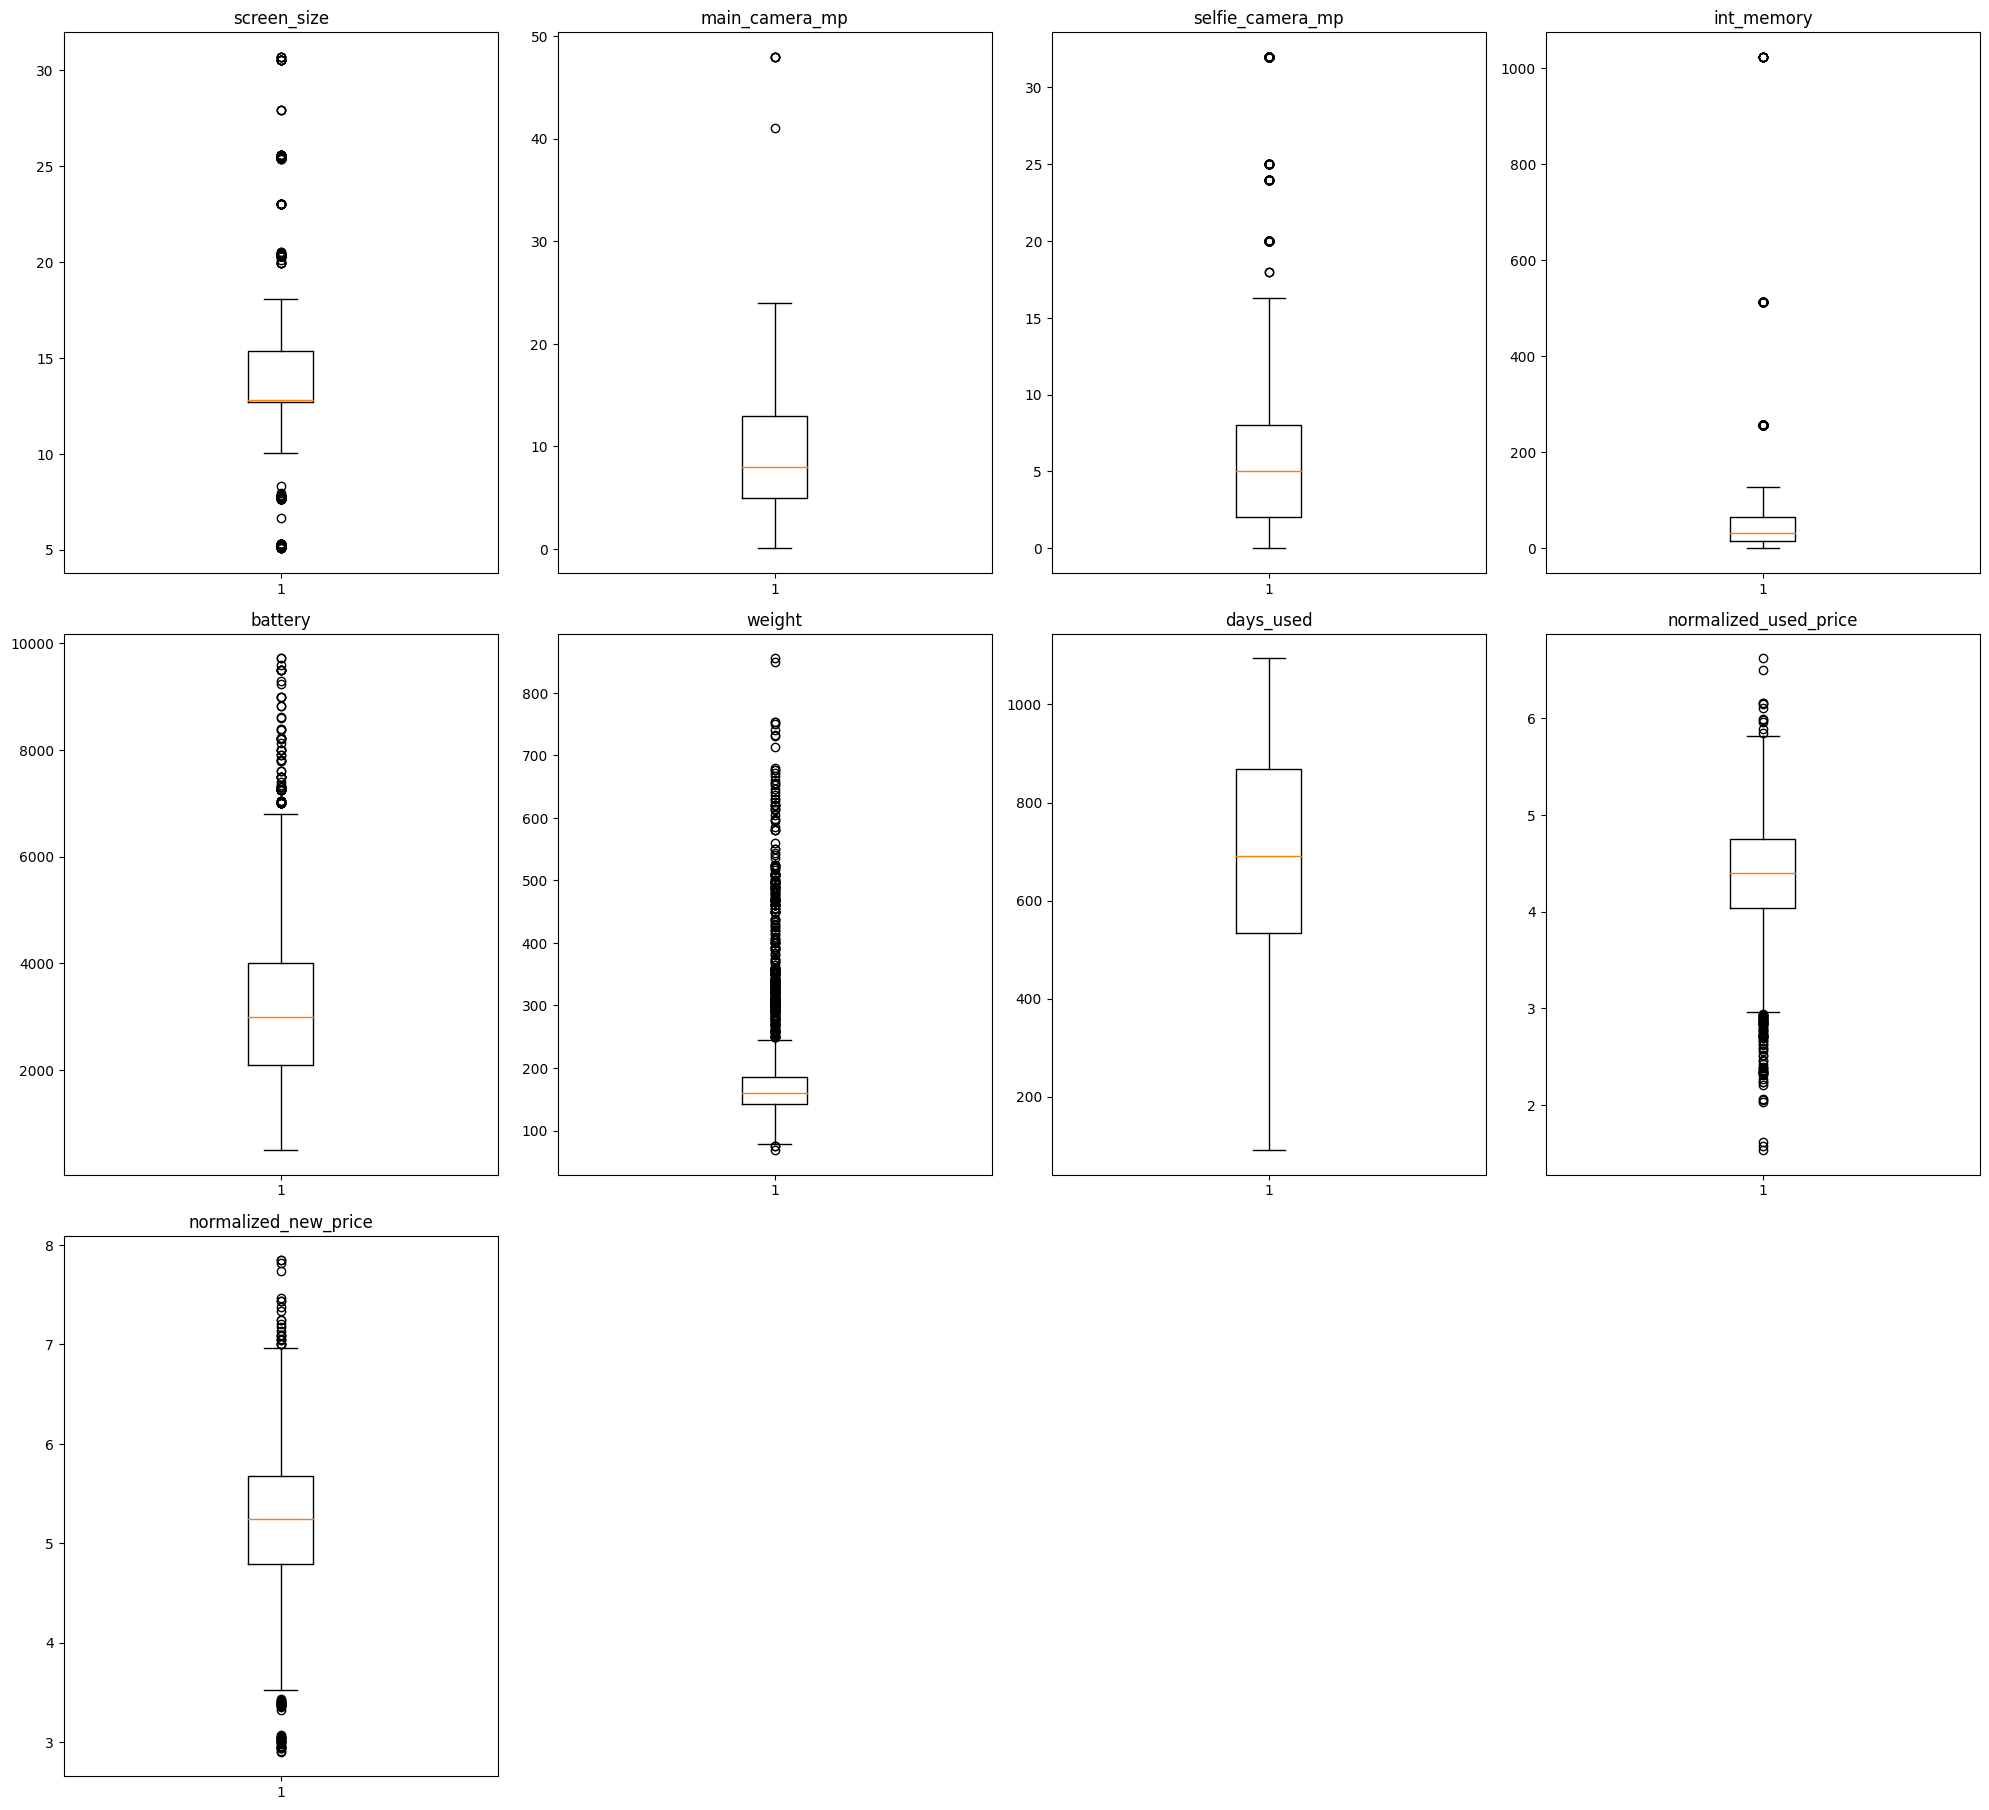

In [459]:
plt.figure(figsize=(20,30))

for i, x in enumerate(numeric_columns):
  plt.subplot(5, 4, i+1)
  plt.boxplot(df[x], whis = 1.5)
  plt.tight_layout()
  plt.title(x)

plt.show()

No outliners in days_used

rest all have outliners, & to deal with them we are doing capping & flooring

In [460]:
def handleOutliner(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  QDiff= Q3 - Q1
  print(QDiff)
  lowerW = Q1 - 1.5 * QDiff
  upperW = Q3 + 1.5 * QDiff

  df[col] = np.clip(df[col], lowerW, upperW)  # any value greater that upper whisher would be  replaved with upperW & vice versa

  return df

def handleOutlinerAll(df, cols):
  for i in cols:
    df = handleOutliner(df, i)
  return df;


In [461]:
numeric_columns = df.select_dtypes(include = np.number).columns.tolist()
df = handleOutlinerAll(df, numeric_columns)

2.6400000000000006
8.0
6.0
48.0
1900.0
43.0
4.0
335.25
0.7217691550863234
0.8833764067778649


Rechecking for outliners

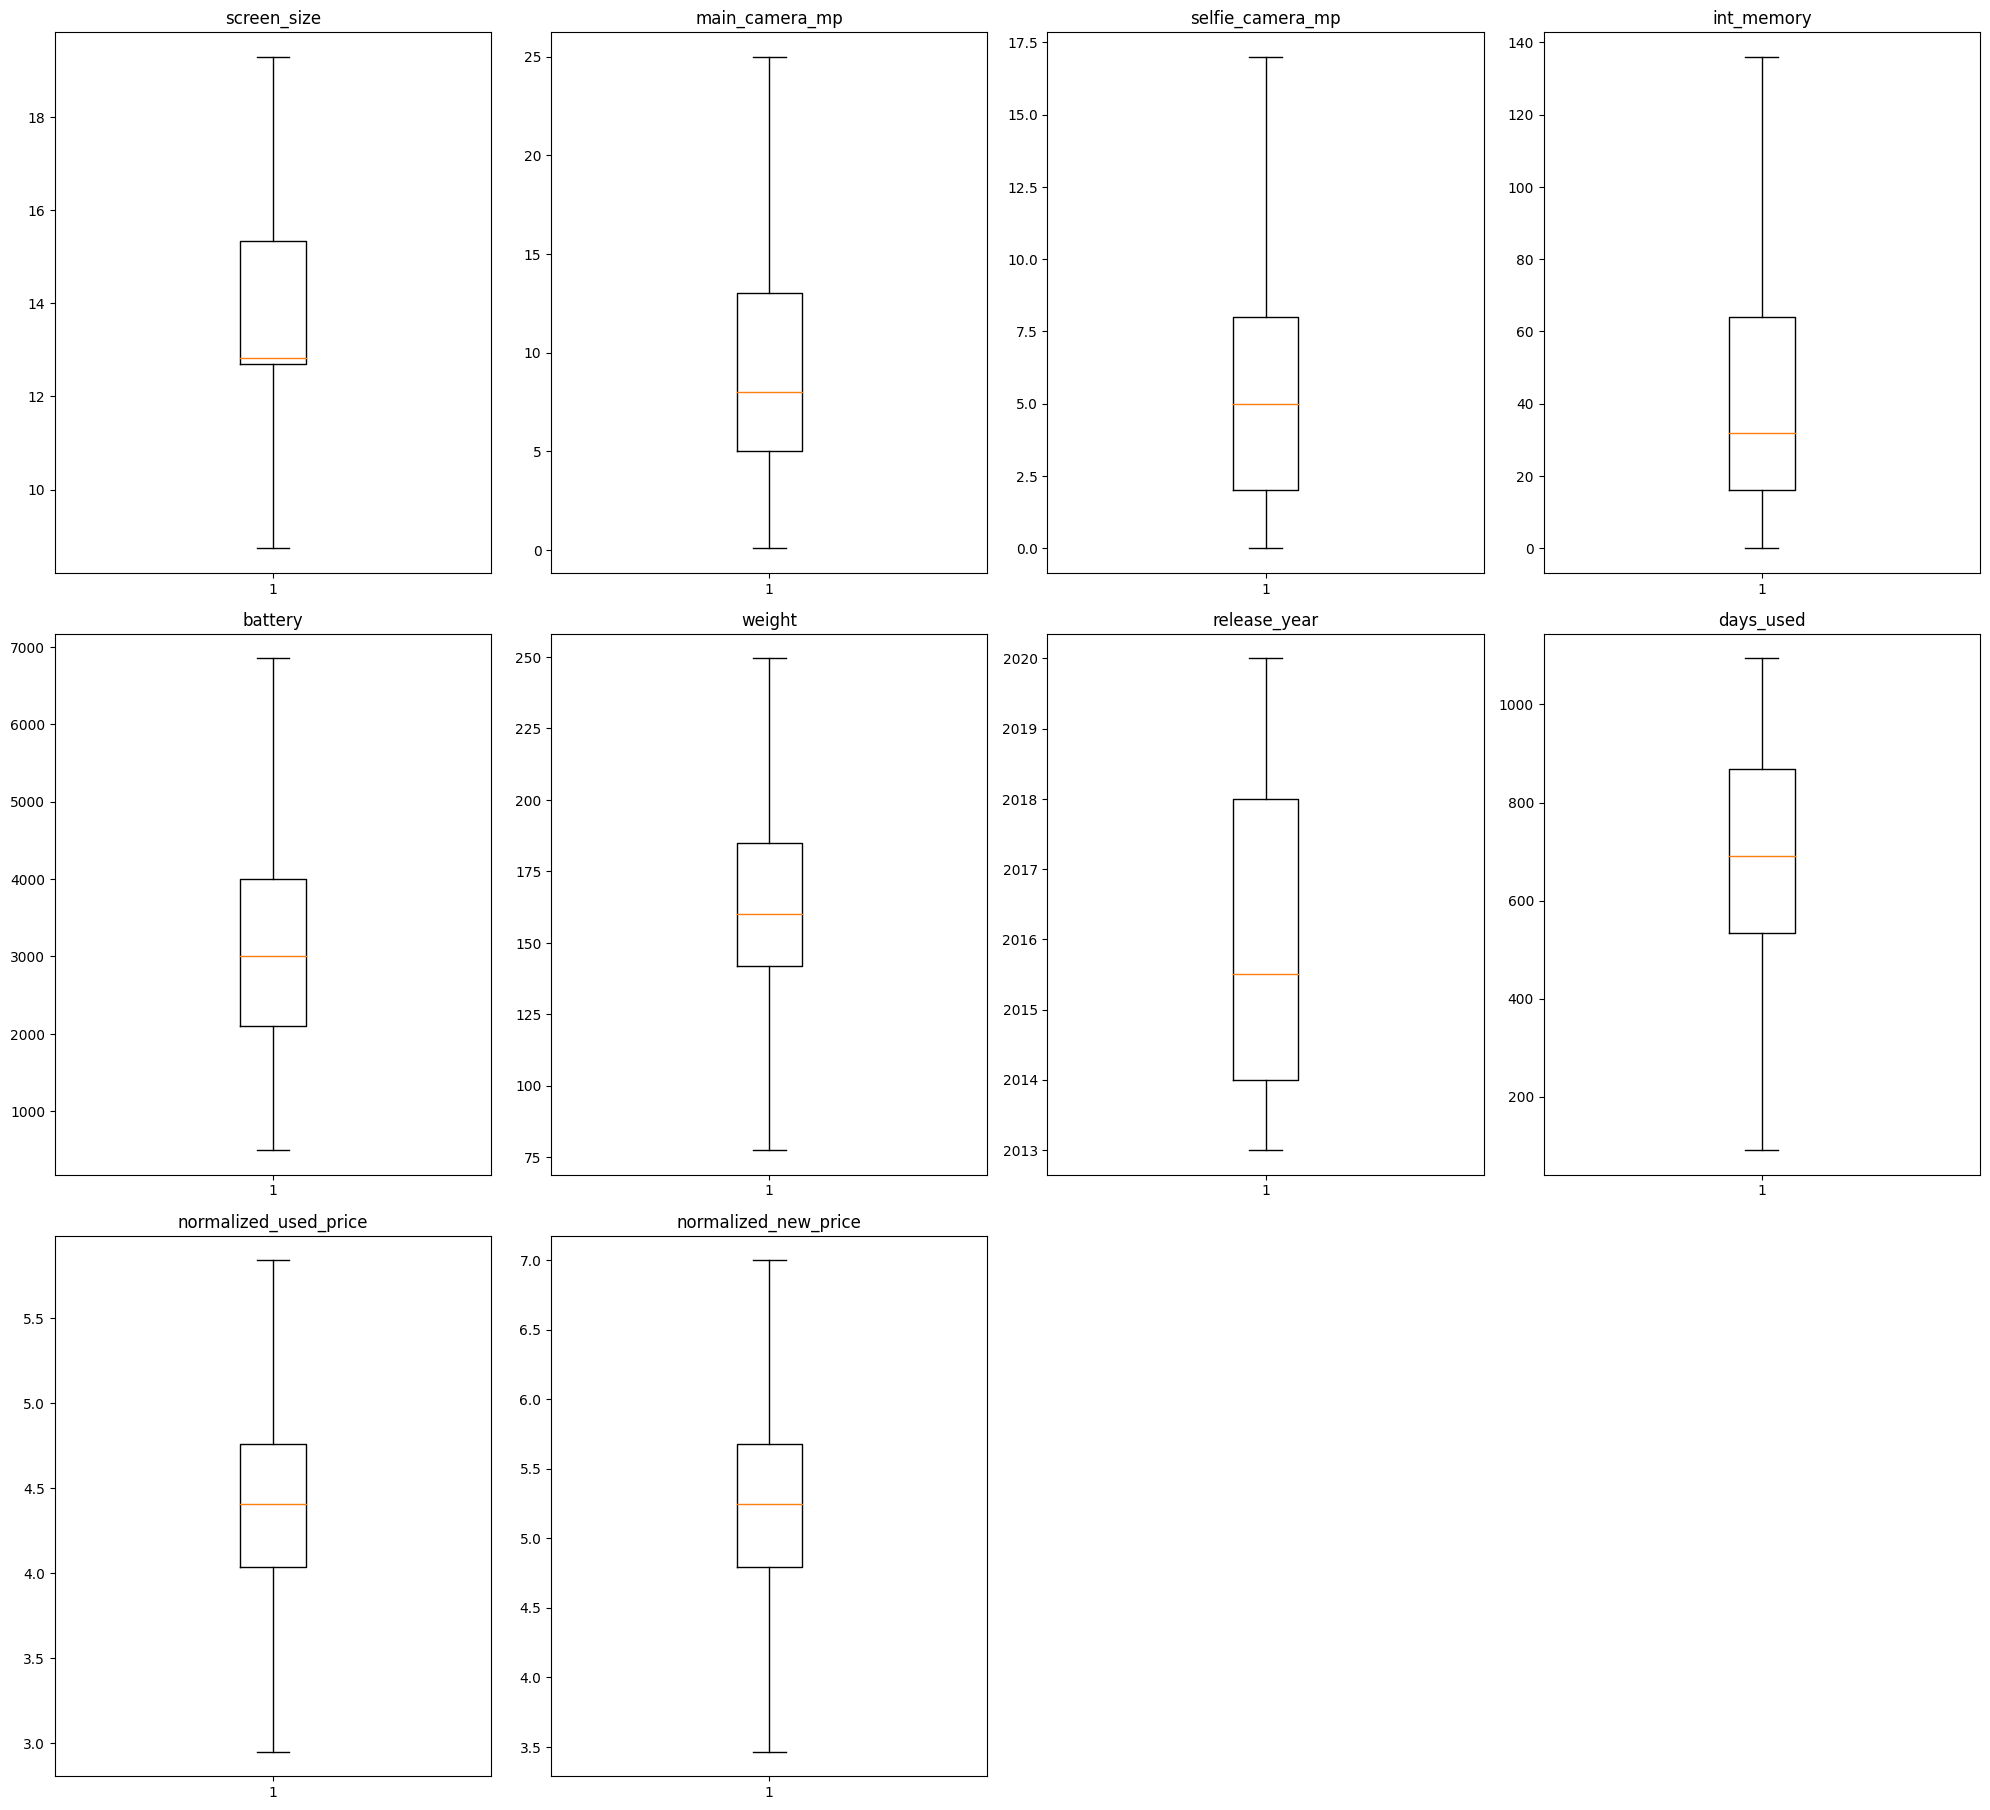

In [462]:
plt.figure(figsize=(20,30))

for i, x in enumerate(numeric_columns):
  plt.subplot(5, 4, i+1)
  plt.boxplot(df[x], whis = 1.5)
  plt.tight_layout()
  plt.title(x)

plt.show()


## Model Building - Linear Regression

In [463]:
#declaring & initilize X & y (value to be predicted) variable

X = df.drop(["normalized_used_price", "release_year"], axis=1)
y = df["normalized_used_price"]




In [464]:
#encoding categorical variable

X = pd.get_dummies(X, columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)
print(X.shape)
X.head()

(3454, 44)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,normalized_new_price,brand_name_Alcatel,brand_name_Apple,...,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_NA_Android,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3020.0,146.0,127,4.715100,0,0,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,4300.0,213.0,325,5.519018,0,0,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,4200.0,213.0,162,5.884631,0,0,...,0,0,0,0,0,0,0,0,1,1
3,19.30,13.0,8.0,64.0,6850.0,249.5,345,5.630961,0,0,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,5000.0,185.0,293,4.947837,0,0,...,0,0,0,0,0,0,0,0,1,0


In [465]:
#splitting data into test & Train 70:30 ration

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("train shape", x_train.shape)
print("test shape", x_test.shape)

train shape (2417, 44)
test shape (1037, 44)


In [466]:
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [467]:
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,0.044681
main_camera_mp,0.022009
selfie_camera_mp,0.017377
int_memory,0.000625
battery,0.000013
weight,0.001137
days_used,-0.000004
normalized_new_price,0.380806
brand_name_Alcatel,-0.072928
brand_name_Apple,0.075996


## Model Performance Check

In [468]:
#lets check the score of our model on test data
linearregression.score(x_test, y_test)

0.8376483730918203

So,we have a model performance score of 83%

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#multicolinearity test (text copied from linear regression notes shared  by Greatlearning)

1.The variance inflationfactor (VIF) identifies correlation between independent variables and thestrength of that correlation.2.Statsmodel based linear models provide a VIF for each independent variable3.VIFs start at 1 and have no upper limit.a.A value of 1 indicates that there is no correlation between this independent variable and any othersb.VIFs between 1 and 5 suggest that there is a moderate correlation, but it is not severe enough to warrant  corrective measuresc.VIFs greater than 5 represent critical levels of multicollinearity where the coefficients are poorly estimated,and the p-values are questionabl

In [469]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_check(predictors):
  vif = pd.DataFrame()
  vif["feature"] = predictors.columns

  vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
  return vif

In [470]:
x_train1 = sm.add_constant(x_train)

x_test1 = sm.add_constant(x_test)

vif_check(x_train1)

,feature,VIF
0,const,231.288070
1,screen_size,5.404215
2,main_camera_mp,2.354683
3,selfie_camera_mp,3.311368
4,int_memory,2.317528
5,battery,3.681957
6,weight,4.636559
7,days_used,1.903645
8,normalized_new_price,2.897195
9,brand_name_Alcatel,3.454183


as we can see, we have some values o of multicolineratity > 5  hence we will be removing that

In [471]:
def treating_multicollinearity(predictors, target, high_vif_columns):

    adj_r2 = []
    rmse = []

    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))


    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [472]:
col_list = ["brand_name_Samsung", "brand_name_Others", "brand_name_Others", "brand_name_Huawei", "screen_size"]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.840977,0.225266
1,brand_name_Huawei,0.840916,0.225310
2,brand_name_Others,0.840898,0.225322
3,brand_name_Others,0.840898,0.225322
4,screen_size,0.831829,0.231655


In [473]:
col_to_drop_list = ["brand_name_Samsung", "brand_name_Others", "brand_name_Others", "brand_name_Huawei", "screen_size"]
for x in col_to_drop_list:
  x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(x)]
  x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(x)]

# Check VIF now
vif = vif_check(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Samsung


,feature,VIF
0,const,215.680570
1,main_camera_mp,2.353865
2,selfie_camera_mp,3.265240
3,int_memory,2.315438
4,battery,3.295132
5,weight,2.755866
6,days_used,1.870533
7,normalized_new_price,2.892542
8,brand_name_Alcatel,3.453526
9,brand_name_Apple,2.362036


## Final Model

In [474]:
linearregression.score(x_test, y_test)

0.8376483730918203

## Actionable Insights and Recommendations

1. We can see that selfie_camera, screen_size, and int_memory are all significant factors (more so in this order). This is demonstrated by positive coefficients for these parameters anticipated by the model as these grow.

2. 4g and 5g are both significant characteristics, with 5g marginally positively influencing used_price and 4g marginally negatively influencing it, as expected.

3. Although preliminary EDA suggested a significantly favorable connection between phone weight and battery size as battery size increased (0.7), weight and battery were found to be insignificant factors in determining used_price. RAM for refurbished phones was discovered to be a consistent 4GB on average across the dataset, as well as inconsequential. Similarly to RAM, nearly 90% of phones were discovered to be running on Android, another unimportant element for prediction.

___